In [45]:
import tensorflow as tf
import numpy as np
from tensorflow import keras
import matplotlib.pyplot as plt

In [46]:
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

In [47]:
len(x_train)

60000

In [48]:
x_train.shape

(60000, 28, 28)

In [49]:
x_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

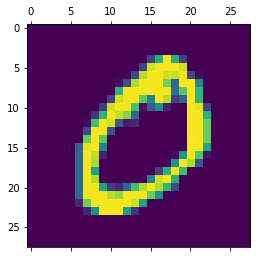

In [50]:
plt.matshow(x_train[1])

In [51]:
y_train[1]

0

In [52]:
x_train_flattened = x_train.reshape(len(x_train),28*28)
x_test_flattened = x_test.reshape(len(x_test), 784)

In [53]:
x_train_flattened = x_train_flattened/255
x_test_flattened = x_test_flattened/255

In [54]:
x_train_flattened.shape

(60000, 784)

In [55]:
from keras import layers

In [56]:
model = keras.Sequential([
    layers.Dense(10, input_shape=[784], activation="sigmoid")
])

In [57]:
model.compile(
    optimizer = "adam",
    loss = "sparse_categorical_crossentropy",
    metrics = ["accuracy"]
)

In [58]:
model.fit(x_train_flattened, y_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 2s 862us/step - loss: 0.4724 - accuracy: 0.8777
Epoch 2/5
1875/1875 [==============================] - 2s 835us/step - loss: 0.3044 - accuracy: 0.9146
Epoch 3/5
1875/1875 [==============================] - 2s 872us/step - loss: 0.2839 - accuracy: 0.9205
Epoch 4/5
1875/1875 [==============================] - 2s 858us/step - loss: 0.2727 - accuracy: 0.9244
Epoch 5/5
1875/1875 [==============================] - 2s 854us/step - loss: 0.2669 - accuracy: 0.9257


In [60]:
model.evaluate(x_test_flattened, y_test)

313/313 [==============================] - 1s 1ms/step - loss: 0.2658 - accuracy: 0.9261


[0.2658347487449646, 0.9261000156402588]

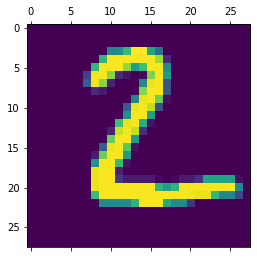

In [65]:
plt.matshow(x_test[1])

In [62]:
predictions = model.predict(x_test_flattened)

In [66]:
predictions[1]

array([4.9101561e-01, 5.2547157e-03, 9.9964947e-01, 2.9596519e-01,
       3.9064743e-10, 8.4417564e-01, 9.3219042e-01, 1.3580955e-12,
       8.7152898e-02, 2.1335087e-09], dtype=float32)

In [68]:
y_preds =  [np.argmax(i) for i in predictions]

In [70]:
cm = tf.math.confusion_matrix(y_test, y_preds)
cm

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 963,    0,    2,    2,    0,    4,    6,    2,    1,    0],
       [   0, 1114,    3,    2,    0,    1,    4,    2,    9,    0],
       [   4,    7,  938,   14,    8,    2,   12,   10,   32,    5],
       [   2,    0,   23,  926,    0,   21,    2,   10,   16,   10],
       [   2,    1,    9,    1,  916,    0,    7,    4,    8,   34],
       [   9,    2,    6,   36,    9,  777,   15,    5,   25,    8],
       [  13,    3,    9,    1,    7,   10,  912,    2,    1,    0],
       [   1,    5,   26,    5,    8,    0,    0,  939,    2,   42],
       [   8,    8,    9,   28,    9,   30,    9,    9,  850,   14],
       [  11,    7,    1,   11,   28,    6,    0,   14,    5,  926]])>

In [72]:
model = keras.Sequential([
    layers.Dense(100, input_shape=[784], activation="relu"),
    layers.Dense(10, activation="sigmoid")
])

model.compile(
    optimizer = "adam",
    loss = "sparse_categorical_crossentropy",
    metrics = ["accuracy"]
)
model.fit(x_train_flattened, y_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2779 - accuracy: 0.9202
Epoch 2/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.1232 - accuracy: 0.9642
Epoch 3/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0856 - accuracy: 0.9745
Epoch 4/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0664 - accuracy: 0.9805
Epoch 5/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0517 - accuracy: 0.9846


In [78]:
predictions = model.predict(x_test_flattened)
model.evaluate(x_test_flattened, y_test)


313/313 [==============================] - ETA: 0s - loss: 0.0835 - accuracy: 0.97 - 1s 2ms/step - loss: 0.0857 - accuracy: 0.9723


[0.08574523776769638, 0.9722999930381775]

In [81]:
import seaborn as sns

Text(69.0, 0.5, 'Truth')

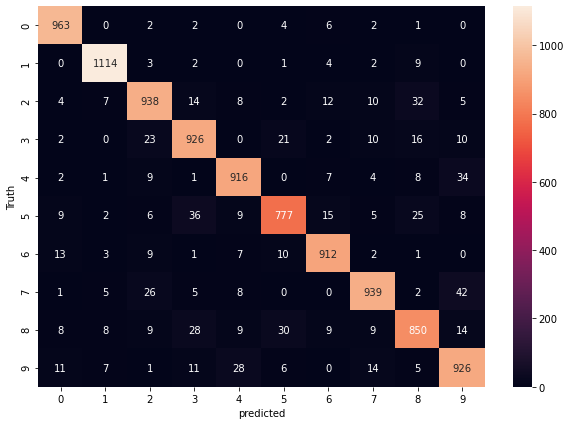

In [82]:
plt.figure(figsize=(10,7))
sns.heatmap(cm, annot=True, fmt="d")
plt.xlabel("predicted")
plt.ylabel("Truth")